<a href="https://colab.research.google.com/github/ssharanyab/ph-Nutralisation/blob/main/ph_Nutralisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INT 246 Project By S. Sharanya Bharghavi (11903126)

In [1]:
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
pH = ctrl.Antecedent(np.arange(0,15,1),'pH')
flowrate = ctrl.Antecedent(np.arange(0,110,10),'flowrate')
acidvalve = ctrl.Consequent(np.arange(0,15,1),'acidvalve')
basevalve = ctrl.Consequent(np.arange(0,15,1),'basevalve')

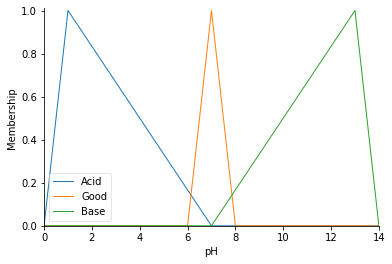

In [4]:
pH['Acid'] = fuzz.trimf(pH.universe,[0,1,7])
pH['Good'] = fuzz.trimf(pH.universe,[6,7,8])
pH['Base'] = fuzz.trimf(pH.universe,[7,13,14])
pH.view()

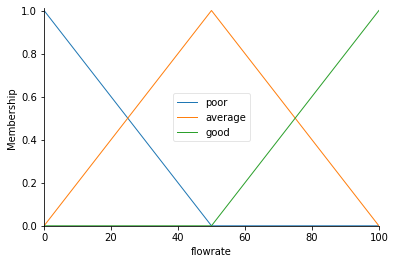

In [5]:
flowrate.automf(3)
flowrate.view()

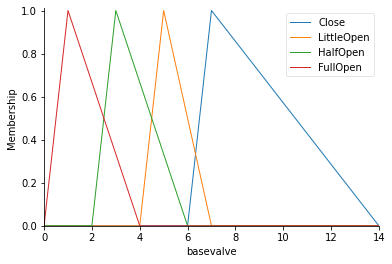

In [6]:
basevalve['Close'] = fuzz.trimf(pH.universe,[6,7,14])
basevalve['LittleOpen'] = fuzz.trimf(pH.universe,[4,5,7])
basevalve['HalfOpen'] = fuzz.trimf(pH.universe,[2,3,6])
basevalve['FullOpen'] = fuzz.trimf(pH.universe,[0,1,4])
basevalve.view()

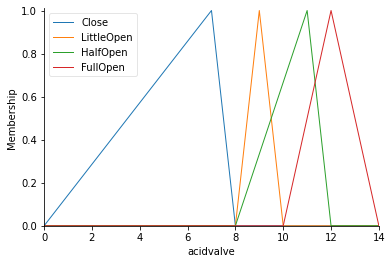

In [7]:
acidvalve['Close'] = fuzz.trimf(pH.universe,[0,7,8])
acidvalve['LittleOpen'] = fuzz.trimf(pH.universe,[8,9,10])
acidvalve['HalfOpen'] = fuzz.trimf(pH.universe,[8,11,12])
acidvalve['FullOpen'] = fuzz.trimf(pH.universe,[10,12,14])
acidvalve.view()

In [8]:
rule1 = ctrl.Rule(pH['Acid'] & flowrate['poor'] , (basevalve['LittleOpen'] , acidvalve['Close']))
rule2 = ctrl.Rule(pH['Acid'] & flowrate['average'] , (basevalve['HalfOpen'], acidvalve['Close']))
rule3 = ctrl.Rule(pH['Acid'] & flowrate['good'], (basevalve['FullOpen'], acidvalve['Close']))
rule4 = ctrl.Rule(pH['Good'] & flowrate['poor'], (basevalve['Close'], acidvalve['Close']))
rule5 = ctrl.Rule(pH['Good'] & flowrate['average'], (basevalve['Close'], acidvalve['Close']))
rule6 = ctrl.Rule(pH['Good'] & flowrate['good'], (basevalve['Close'], acidvalve['Close']))
rule7 = ctrl.Rule(pH['Base'] & flowrate['poor'], (basevalve['Close'], acidvalve['LittleOpen']))
rule8 = ctrl.Rule(pH['Base'] & flowrate['average'],( basevalve['Close'], acidvalve['HalfOpen']))
rule9 = ctrl.Rule(pH['Base'] & flowrate['good'], (basevalve['Close'], acidvalve['FullOpen']))

In [9]:
pH_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
pH_controling = ctrl.ControlSystemSimulation(pH_ctrl)

In [10]:
pH_controling.input['pH'] = 2
pH_controling.input['flowrate'] = 90
pH_controling.compute()
print(pH_controling.output)

OrderedDict([('basevalve', 2.2293785310734457), ('acidvalve', 4.9333333333333345)])
